In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fashion_train=pd.read_csv("/content/drive/MyDrive/Projects Datasets/fashion-mnist_train.csv")
fashion_test=pd.read_csv("/content/drive/MyDrive/Projects Datasets/fashion-mnist_test.csv")

In [3]:
fashion_train_x,fashion_train_y=fashion_train.iloc[:,1:]/255,fashion_train.iloc[:,0]

In [4]:
fashion_train_x.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


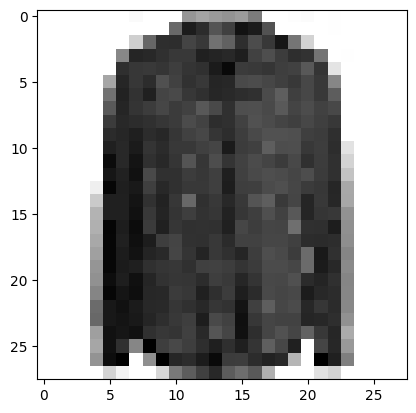

In [5]:
plt.imshow(fashion_train_x.iloc[2].values.reshape(28,28),cmap="binary")

In [6]:
fashion_train_y[2]

6

In [7]:
class_name= [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]
class_name[6]

'Shirt'

In [8]:
fashion_train_x.shape[0]


60000

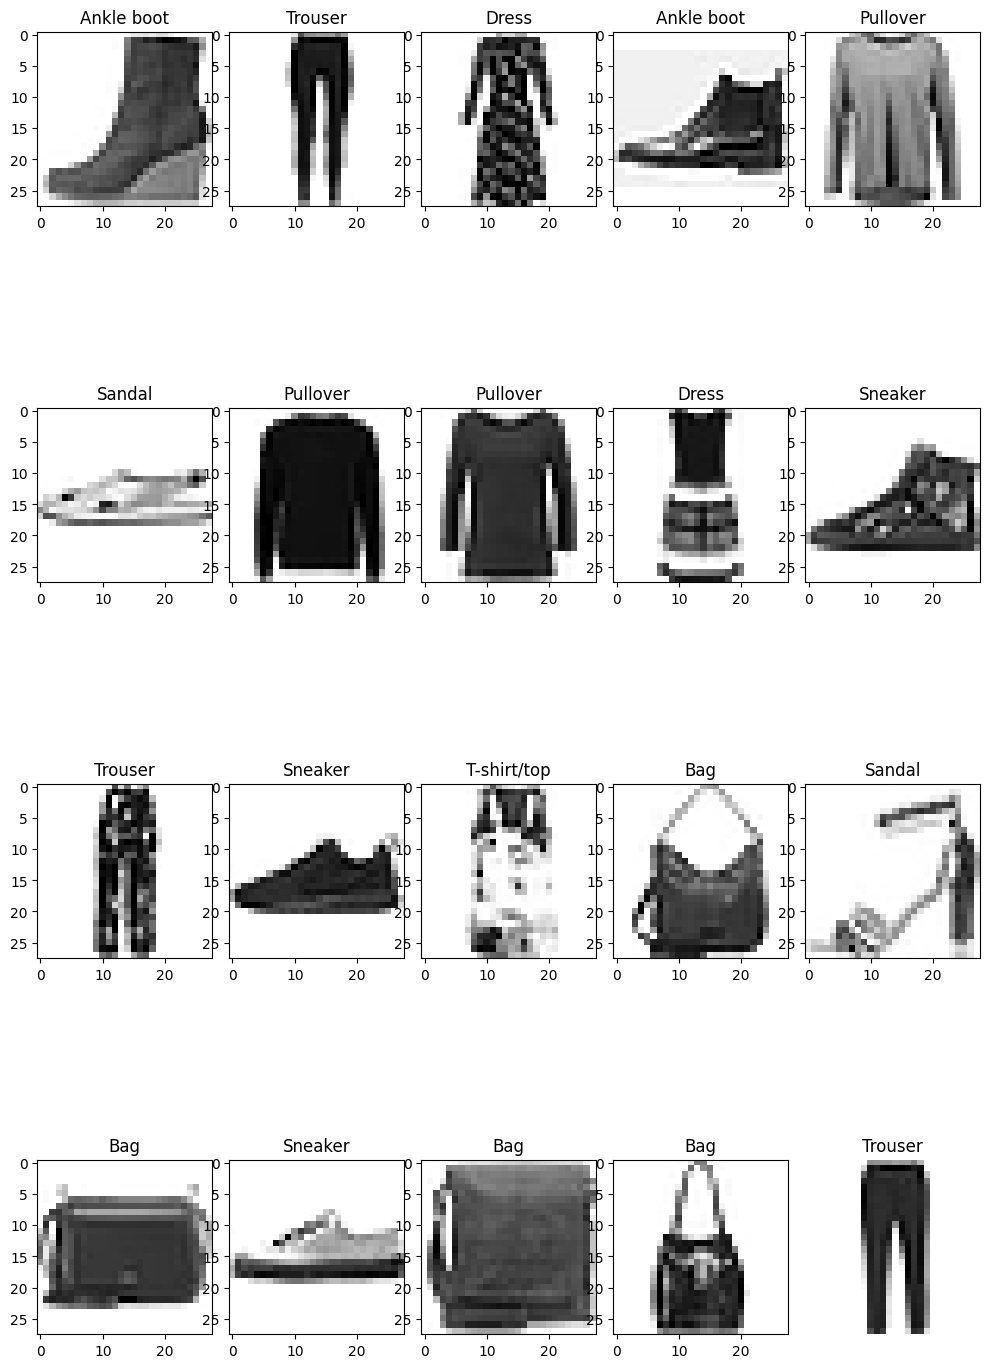

In [9]:
#listing 20 random class_name and their figures
random_cloths = np.random.randint(0, 60000, 20)
fig, axes = plt.subplots(4, 5, figsize=(10, 15))
axes = axes.ravel()
for i, rc in enumerate(random_cloths):
    axes[i].imshow(fashion_train_x.iloc[rc].values.reshape(28, 28), cmap="binary")
    axes[i].set_title(class_name[fashion_train_y[rc]])
plt.tight_layout()
plt.subplots_adjust(wspace=0.1, hspace=0.1) #to remove space between subplot
plt.axis("off")
plt.show()


In [10]:
import tensorflow as tf


In [11]:
model1=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[784]),
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(300,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(50,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")

])
model1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 300)                 │         150,300 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 10)                  │             510 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 578,460 (2.21 MB)

 Trainable params: 578,460 (2.21 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
model1.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])
callback_es=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history1=model1.fit(fashion_train_x,fashion_train_y,epochs=50,validation_split=0.1,callbacks=[callback_es])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.6442 - loss: 1.1125 - val_accuracy: 0.7478 - val_loss: 0.6560
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8273 - loss: 0.4886 - val_accuracy: 0.8312 - val_loss: 0.4906
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8498 - loss: 0.4200 - val_accuracy: 0.8547 - val_loss: 0.4172
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8622 - loss: 0.3895 - val_accuracy: 0.8592 - val_loss: 0.3984
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.8692 - loss: 0.3637 - val_accuracy: 0.8673 - val_loss: 0.3794
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8759 - loss: 0.3484 - val_accuracy: 0.8653 - val_loss: 0.3781
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8822 - loss: 0.3258 - val_accuracy: 0.8733 - val_loss: 0.3581
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8865 - loss: 0.

<Axes: >

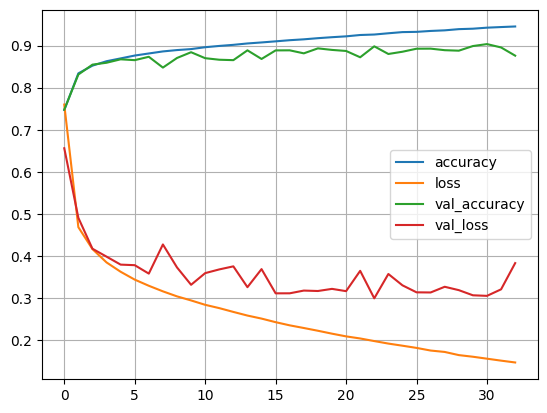

In [13]:
pd.DataFrame(history1.history).plot(kind="line",grid=True)

In [14]:
fashion_test_x,fashion_test_y=fashion_test.iloc[:,1:]/255,fashion_test.iloc[:,0]
model1.evaluate(fashion_test_x,fashion_test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8920 - loss: 0.2963


[0.28998294472694397, 0.8964999914169312]

In [15]:
model2=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[784]),
    tf.keras.layers.Dense(500,activation="relu"),
    tf.keras.layers.Dense(250,activation="relu"),
    tf.keras.layers.Dense(125,activation="relu"),
    tf.keras.layers.Dense(75,activation="relu"),
    tf.keras.layers.Dense(30,activation="relu"),
    tf.keras.layers.Dense(15,activation="relu"),
    tf.keras.layers.Dense(10,activation="sigmoid")

])
model2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 500)                 │         392,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 250)                 │         125,250 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 125)                 │          31,375 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 75)                  │           9,450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 30)                  │           2,280 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 15)                  │             465 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │             160 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 561,480 (2.14 MB)

 Trainable params: 561,480 (2.14 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model2.compile(loss="sparse_categorical_crossentropy",optimizer='sgd',metrics=["accuracy"])
callback_es=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)
history2=model2.fit(fashion_train_x,fashion_train_y,epochs=50,validation_split=0.1,callbacks=[callback_es])

Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.5255 - loss: 1.3987 - val_accuracy: 0.8105 - val_loss: 0.5516
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.8152 - loss: 0.5246 - val_accuracy: 0.8260 - val_loss: 0.4986
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8439 - loss: 0.4455 - val_accuracy: 0.8422 - val_loss: 0.4554
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8605 - loss: 0.3945 - val_accuracy: 0.8342 - val_loss: 0.4731
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.8675 - loss: 0.3688 - val_accuracy: 0.8375 - val_loss: 0.4732
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.8737 - loss: 0.3490 - val_accuracy: 0.8473 - val_loss: 0.4154
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 6ms/step - accuracy: 0.8780 - loss: 0.3311 - val_accuracy: 0.8553 - val_loss: 0.3967
Epoch 8/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8873 - loss: 0

In [17]:
model2.evaluate(fashion_test_x,fashion_test_y)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8889 - loss: 0.3113


[0.3005593717098236, 0.8935999870300293]

In [18]:
%pip install -q -U keras-tuner
import keras_tuner as kt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 3.0 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int("n_neurons", min_value=16, max_value=256)
    learning_rate = hp.Float("learning_rate", min_value=1e-4, max_value=1e-2,
                             sampling="log")
    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [ ]:
random_search_tuner = kt.RandomSearch(
    build_model, objective="val_accuracy", max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(fashion_train_x,fashion_train_y,epochs=20,
                           validation_split=0.1)

Trial 5 Complete [00h 02m 24s]
val_accuracy: 0.7925000190734863

Best val_accuracy So Far: 0.8734999895095825
Total elapsed time: 00h 11m 15s
